In [1]:
import numpy as np

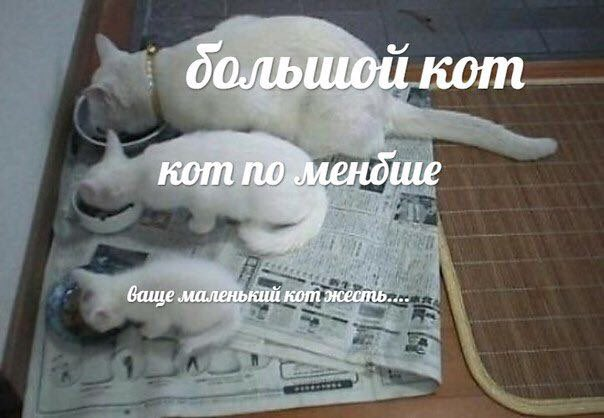

# **Органзационные моменты**

#### **Что лучше повторить**
1. Комбинаторика
2. Наивная теория множеств
---

#### **Большой план** (семестр)
1. Элементы теории вероятностей
2. Случайные величины и описательная статистика
3. Точечное и доверительное оценивание
4. Дискретные цепи Маркова
---



#### **Контрольные мероприятия**
*   После каждой большой темы будут **дз (6 БаРС) + проверочная (10 БаРС)**
*   Проверочная пишется на паре
*   На проверочной можно пользоваться только конспектами

---

#### **План поменбше** (ближайшие занятия)
1. Классическое определение вероятности
2. Геометрическое определение вероятности
3. Условная вероятность, независимость, формула полной вероятности и теорема Байеса
4. Проверочная

---


# **Какие задачи помогают решать модели теории вероятности**










**Задача 1 (Пари)**:
Вам дают 500 рублей. И предлагают сыграть в орлянку: орёл – вы отдаёте 500 рублей обратно, решка – вы получаете 1000 рублей и можете сыграть снова.

Будете ли вы играть, или нет? Почему?

---

**Задача 1.2 (Встреча)**:
Два студента условились встретиться на выходе станции метро Владимирская с 12:00 до 13:00.
Условия следующие: каждый студент приходит в случайное время в промежутке и ждет 20 минут.

Как выбрать случайный промежуток времени? Встретятся ли друзья? Как оценить шанс того, что они встретят друг друга? Что такое шанс?

---

**Задача 1.3 (Интерполяция/Регрессия)**:
Вам даны данные о спросе на молоко в зависимости от температуры воздуха на улице.
У вас есть 20 измерений температура/число проданных бутылок молока.

Какая модель нам поможет предсказать спрос на молоко, если известна температура за окном?

А если известно, что в данные о числе проданных бутылок вкралась погрешность: данные вносились не очень внимательно?
И число проданных бутылок не считалось, а оценивалось?

---

**Задача 1.4 (Риск)**:
Вы планируете отпуск в Турции.

Известно, что это весьма опасная сейсмическая зона. Как думаете, придётся ли на отпуск землетрясение?

К тому же, там наблюдается весьма сильная социальная напряжённость. Стоит ли бояться уличных беспорядков?

---

# **Классическое определение вероятности**

In [2]:
from itertools import combinations

def get_powerset(iterable):
    "Generates all possible subsets (the power set) of an iterable."
    s = list(iterable)
    # Generate combinations of all lengths from 0 to the total length
    return [tuple(combo) for i in range(len(s) + 1) for combo in combinations(s, i)]

In [3]:
# Example usage:
my_set = set({1, 2, 3})
all_subsets = get_powerset(my_set)
print(all_subsets)

[(), (1,), (2,), (3,), (1, 2), (1, 3), (2, 3), (1, 2, 3)]


In [4]:
from random import choice

class classic_probability_distribution():
  def __init__(self, event_space, events=None):
    self.event_space = event_space
    self.power = len(event_space)
    if events:
      self.events = events
    else:
      self.events = get_powerset(self.event_space)

  def get_proba(self, event):
    assert(event in self.events)
    return len(event) / self.power

  def get_sample(self):
    return choice(list(self.event_space))

In [5]:
dice = classic_probability_distribution(set([1, 2, 3, 4, 5, 6]))
odd = (1, 2, 3,)

In [6]:
dice.get_proba(odd)

0.5

In [10]:
from collections import Counter

n_experiments = 100000
samples = [dice.get_sample() for _ in range(n_experiments)]
n_success = sum(Counter(samples)[x] for x in odd)
n_success / n_experiments

0.50091